# 感知机 Perceptron
## 算法实现 implemetation of algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

### 数据集 Dataset

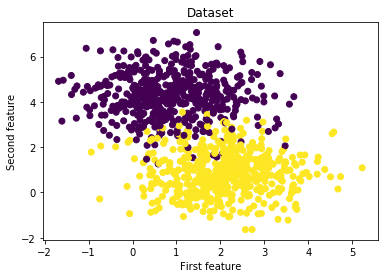

In [2]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
y[y == 0] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [3]:
class Perceptron():
    def __init__(self):
        self.weights = 0
        self.bias = 0

    def fit(self, X_train, y_train, learning_rate=0.05, n_iters=1000):
        '''
        对偶算法
        '''
        bias = 0
        n_samples, n_features = X_train.shape
        alpha = np.zeros(n_samples)
        gram = np.dot(X_train, X_train.T)
        for _ in range(n_iters):
            act = 0
            i = np.random.randint(0, n_samples)
            act = np.sum(alpha * gram[i] * y_train) + bias
            # 误分类点
            if(y_train[i]*act <= 0):
                alpha[i] += learning_rate
                bias += learning_rate * y_train[i]
        self.weights = np.dot(alpha * y_train, X_train)
        self.bias = bias
        return self.weights, self.bias

    def predict(self, X_test):
        a = np.dot(X_test, self.weights) + self.bias
        return np.array([1 if elem > 0 else - 1 for elem in a])
    
    def score(self, X_test, y_test):
        y_p = self.predict(X_test)
        return np.mean(np.where(y_p == y_test, 1, 0))

### 测试 Testing

In [4]:
clf = Perceptron()
w_trained, b_trained = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.956

### 决策边界可视化 Visualize decision boundary

In [5]:
def plot_2d_hyperplane(X, y, weights, bias):
    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.plot(x_hyperplane, y_hyperplane, '-')
    plt.title("Dataset and decision boundary")
    plt.xlabel("First feature")
    plt.ylabel("Second feature")
    plt.show()

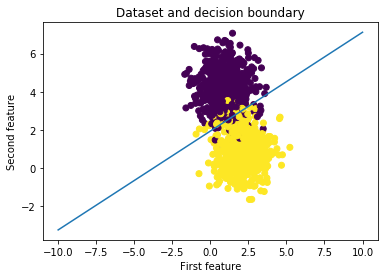

In [6]:
plot_2d_hyperplane(X, y, w_trained, b_trained)

## scikit-learn

In [7]:
from sklearn.linear_model import Perceptron

In [8]:
p_clf = Perceptron()
p_clf.max_iter = 1000
p_clf.fit(X_train,y_train)
p_clf.score(X_test,y_test)

0.94